<a href="https://colab.research.google.com/github/RomuloPaiva01/Desafio-Codenation-ENEM/blob/master/enem_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')

df_train

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,1,3552205.0,Sorocaba,35.0,SP,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,B,C,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,2,NaN,NaN,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,B,A,B,B,I,A,4.0,4.0,5.0,5.0,4.0,5,5,5,5,5,5,5,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,1,1,4303202.0,Cacique Doble,43.0,RS,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2,2,2,2,2,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,3,1,3304557.0,Rio de Janeiro,33.0,RJ,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,B,A,B,A,A,C,B,B,B,C,E,E,5.0,5.0,5.0,5.0,5.0,5,5,2,5,5,3,5,5.0,A,A,A,A,D,A,A,A,D


In [2]:
df_test = pd.read_csv('test.csv')

df_test

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A


In [0]:
#podemos simplificar o problema acima e só pegar as notas, pois éé provavelmente apenas issp que tem correlação entre as notas. Não importa aonde vc mora

#data_set treino so notas = 

df_train_simplificado = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']]



In [4]:
df_train_simplificado

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,436.3,495.4,581.2,520.0,399.4
1,474.5,544.1,599.0,580.0,459.8
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13725,438.2,419.7,394.5,440.0,403.2
13726,423.8,557.9,533.0,560.0,452.4
13727,460.5,528.9,569.3,600.0,398.0
13728,422.5,621.7,569.0,460.0,386.6


In [5]:

#temos que fazer uma limpa no dataset antes de fazer o split

#sempre que tiver um nan em alguma linha, vamos remover a linha

df_train_simplificado = df_train_simplificado.dropna()

X = df_train_simplificado[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]

y= df_train_simplificado['NU_NOTA_MT']

'''
X = X/1000

y = y/1000
'''

'\nX = X/1000\n\ny = y/1000\n'

In [6]:
X

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,436.3,495.4,581.2,520.0
1,474.5,544.1,599.0,580.0
5,439.7,583.2,410.9,620.0
6,420.1,604.2,484.5,560.0
7,619.6,625.8,611.2,620.0
...,...,...,...,...
13725,438.2,419.7,394.5,440.0
13726,423.8,557.9,533.0,560.0
13727,460.5,528.9,569.3,600.0
13728,422.5,621.7,569.0,460.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


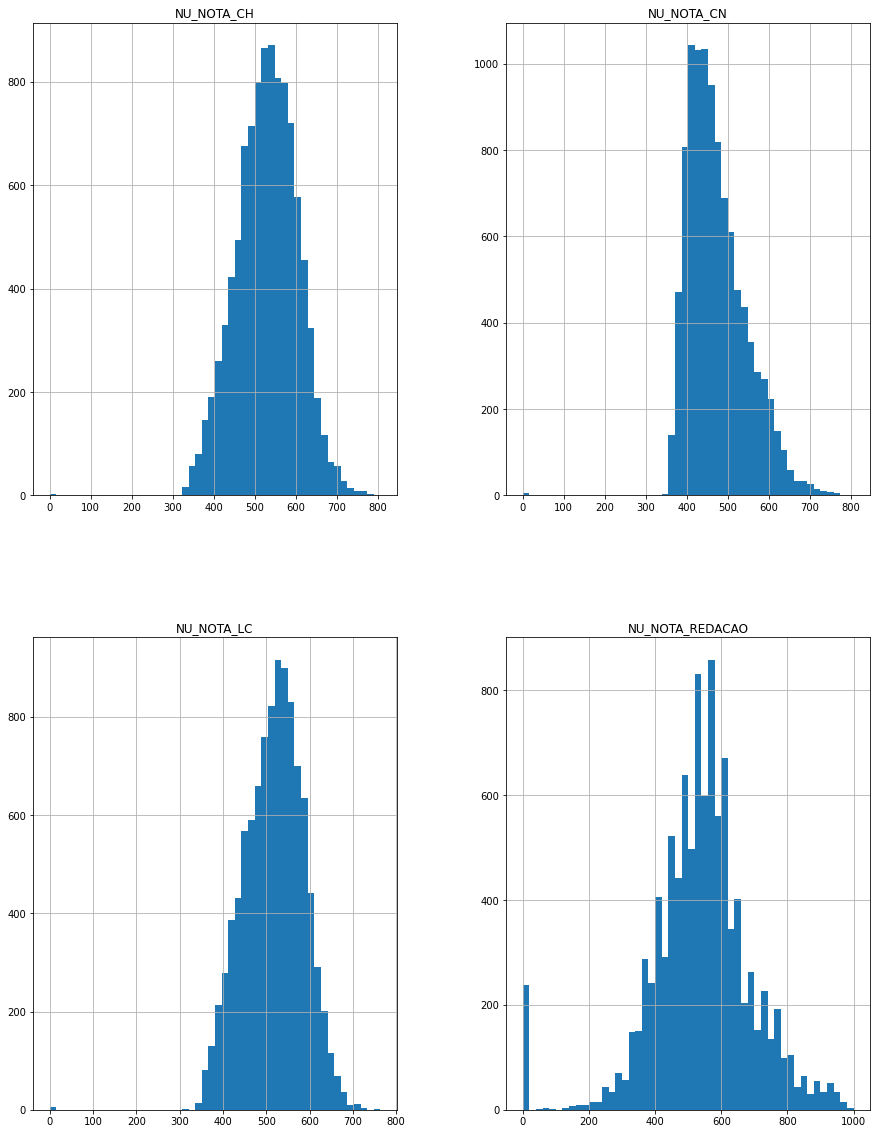

In [24]:
import matplotlib.pyplot as plt


#vendo a distribuicao das notas
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax, bins = 50);


In [8]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np

#agora vamos transformar o df em algo otimizado para o xgboost
import pandas as pd
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

def objective(space):
    print(space)
    clf = xgb.XGBRegressor(n_estimators =200,
                           n_fold = 10,
                           num_parallel_tree = 200,
                           colsample_bytree=space['colsample_bytree'],
                           learning_rate = space['learning_rate'],
                           max_depth = int(space['max_depth']),
                           min_child_weight = int(space['min_child_weight']),
                           subsample = space['subsample'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                           reg_alpha = space['reg_alpha'],
                           objective = 'reg:squarederror')

    eval_set  = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=eval_set,
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)

    score = mean_squared_error(y_test, pred)

    print ("SCORE:", score)

    return {'loss':score, 'status': STATUS_OK }


space ={'max_depth': hp.uniform("x_max_depth", 1, 10),
        'min_child_weight': hp.uniform ('x_min_child', 1, 10),
        'subsample': hp.uniform ('x_subsample', 0.5, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1, 1.0),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.5 ,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda',0,4),
        'reg_alpha' : hp.uniform('x_reg_alpha', 0, 4),
        'learning_rate' :hp.uniform('x_learning_rate', 0.01 , 0.1)
    }


trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

{'colsample_bytree': 0.9696892617708175, 'gamma': 0.4898863269577093, 'learning_rate': 0.060194367519362725, 'max_depth': 5.804032222587666, 'min_child_weight': 3.714415508206434, 'reg_alpha': 0.8266834546185629, 'reg_lambda': 1.413166720290504, 'subsample': 0.7630116460212755}
SCORE:
5589.2237256893095
{'colsample_bytree': 0.6796936201037554, 'gamma': 0.9517434157906902, 'learning_rate': 0.05751409193013592, 'max_depth': 2.720825393493714, 'min_child_weight': 1.2866655315720528, 'reg_alpha': 1.4505481044194628, 'reg_lambda': 0.007758342956198039, 'subsample': 0.7719786633350483}
SCORE:
5509.364454204498
{'colsample_bytree': 0.6719954586793542, 'gamma': 0.5737942027379017, 'learning_rate': 0.06506305348055448, 'max_depth': 9.05853935473477, 'min_child_weight': 8.845434697671873, 'reg_alpha': 3.2207576164183567, 'reg_lambda': 0.29622693158824065, 'subsample': 0.9630849079937502}
SCORE:
5727.044071142991
{'colsample_bytree': 0.8816953563192946, 'gamma': 0.6378273429402833, 'learning_rate

In [13]:
#previsto vs real com as outras notas

xg_reg = xgb.XGBRegressor(n_estimators =200,
                          n_fold = 10,
                          num_parallel_tree = 200,
                          colsample_bytree=best['x_colsample_bytree'],
                          learning_rate = best['x_learning_rate'],
                          max_depth = int(best['x_max_depth']),
                          min_child_weight = int(best['x_min_child']),
                          subsample = best['x_subsample'],
                          gamma = best['x_gamma'],
                          reg_lambda = best['x_reg_lambda'],
                          reg_alpha = best['x_reg_alpha'],
                          objective = 'reg:squarederror')


xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

df_preds = pd.DataFrame(preds)

df_join = pd.concat([X_test,y_test], axis=1, sort=False)

df_join


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
3423,405.1,366.5,376.0,240.0,406.9
2955,445.2,432.3,481.3,400.0,414.5
4258,488.7,495.8,555.3,660.0,433.7
10491,499.2,492.8,536.3,360.0,336.4
2649,373.6,449.3,373.5,400.0,531.1
...,...,...,...,...,...
11409,476.6,574.4,554.8,440.0,555.7
10393,562.3,652.5,615.2,580.0,653.8
810,414.2,559.2,525.0,560.0,393.0
7805,488.8,576.6,598.3,660.0,645.3


In [14]:
y_test.reset_index(drop=True, inplace=True)

y_test

df_join2 = pd.concat([df_preds,y_test], axis=1, sort=False)

df_join2

,0,NU_NOTA_MT
0,413.106873,406.9
1,430.348969,414.5
2,467.096252,433.7
3,454.326508,336.4
4,412.819489,531.1
...,...,...
2015,482.682251,555.7
2016,579.916870,653.8
2017,457.433990,393.0
2018,500.293182,645.3


In [15]:

df_test_simplificado = df_test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]

'''
df_test_simplificado = df_test_simplificado / 1000
'''

df_test_simplificado


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,NaN,NaN,NaN,NaN
4,592.9,492.6,571.4,320.0
...,...,...,...,...
4571,398.3,558.2,511.6,500.0
4572,427.6,579.7,471.1,520.0
4573,639.2,643.8,604.9,640.0
4574,427.1,467.9,540.2,520.0


In [0]:
preds2 = xg_reg.predict(df_test_simplificado)

In [17]:
preds2

array([432.81073, 451.19   , 586.15204, ..., 666.90283, 441.93665,
        36.4129 ], dtype=float32)

In [18]:


#fazendo o csv

'''

**NU_INSCRICAO** e **NU_NOTA_MT**

'''

tamanho = 4576

lst_index = []

for i in range(tamanho):

  lst_index.append(i)

#criando um df com essas 2 colunas e com 4576 linhas

df_resposta = pd.DataFrame(index=lst_index, columns=['NU_INSCRICAO', 'NU_NOTA_MT'])



#agora colocando as respostas no dataset

for i in range(tamanho):

  df_resposta['NU_INSCRICAO'][i] = df_test['NU_INSCRICAO'][i]

  df_resposta['NU_NOTA_MT'][i] = preds2[i]

  #valores de NaN deveriam dar NaN ou 0
  if df_resposta['NU_NOTA_MT'][i] < preds2[3] + 0.01:

    df_resposta['NU_NOTA_MT'][i] = 0


df_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,432.811
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,451.19
2,b38a03232f43b11c9d0788abaf060f7366053b6d,586.152
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,534.615
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,453.033
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,475.596
4573,655fa6306720ff16e825903b5422a46608a77545,666.903
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,441.937


In [19]:
#df_test_simplificado['NU_NOTA_MT'] = df_test_simplificado['NU_NOTA_MT'] * 1000

'''
df_resposta['NU_NOTA_MT'] = df_resposta['NU_NOTA_MT']*1000
'''

df_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,432.811
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,451.19
2,b38a03232f43b11c9d0788abaf060f7366053b6d,586.152
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,534.615
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,453.033
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,475.596
4573,655fa6306720ff16e825903b5422a46608a77545,666.903
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,441.937


In [0]:
file_name = 'answer.csv'

df_resposta.to_csv(file_name, index = False)



from google.colab import files
files.download("answer.csv")
